In [1]:
import os
import pandas as pd
import numpy as np
import json

In [2]:
date = '2019-12-20_21'
example_label_file = '../../DataSet/result/' + date + '/stream_tag.txt'
example_label_df = pd.read_table(example_label_file, sep='\s+', header=None)
example_label_df[3] = 443
example_label_df[4].value_counts()
example_label_df

0      1               2    3       4
0      192.168.50.150  61251   119.57.174.36  443  douyin
1      192.168.50.150  61253   119.57.174.36  443  douyin
2      192.168.50.150  61254   122.14.43.165  443  douyin
3      192.168.50.150  61258   119.57.174.38  443  douyin
4      192.168.50.150  61259   119.57.174.38  443  douyin
...               ...    ...             ...  ...     ...
10535  192.168.50.150  52563  182.61.128.198  443   zhihu
10536  192.168.50.150  52561  182.61.128.198  443   zhihu
10537  192.168.50.150  52562  182.61.128.198  443   zhihu
10538  192.168.50.150  52568   121.29.54.234  443   zhihu
10539  192.168.50.150  52598   220.194.79.73  443   zhihu

[10540 rows x 5 columns]

In [3]:
example_label = {tuple(example_label_df.iloc[i,0:4].values):example_label_df.iloc[i,4] for i in example_label_df.index}
example_label

{('192.168.50.150', 61251, '119.57.174.36', 443): 'douyin',
 ('192.168.50.150', 61253, '119.57.174.36', 443): 'douyin',
 ('192.168.50.150', 61254, '122.14.43.165', 443): 'douyin',
 ('192.168.50.150', 61258, '119.57.174.38', 443): 'douyin',
 ('192.168.50.150', 61259, '119.57.174.38', 443): 'douyin',
 ('192.168.50.150', 61261, '119.57.174.38', 443): 'douyin',
 ('192.168.50.150', 61266, '119.57.174.38', 443): 'douyin',
 ('192.168.50.150', 61267, '122.14.43.40', 443): 'douyin',
 ('192.168.50.150', 61269, '122.14.43.40', 443): 'douyin',
 ('192.168.50.150', 59975, '101.72.202.215', 443): 'douyin',
 ('192.168.50.150', 61273, '122.14.43.40', 443): 'douyin',
 ('192.168.50.150', 61270, '119.57.174.38', 443): 'douyin',
 ('192.168.50.150', 61277, '122.14.43.37', 443): 'douyin',
 ('192.168.50.150', 61271, '119.57.174.38', 443): 'douyin',
 ('192.168.50.150', 61279, '203.187.160.135', 443): 'douyin',
 ('192.168.50.150', 59990, '27.221.24.206', 443): 'douyin',
 ('192.168.50.150', 61306, '122.14.43.27'

In [5]:
example_json_file = '../datasets/2019-12-21/ssl_stat.txt'
example_json_f = open(example_json_file, 'r')
#array_shape = (1771,6)
result_data = list()
result_label = list()
result_key = list()
i = 0
for line in example_json_f.readlines():
    example_json = ''
    try:
        example_json = json.loads(line)
    except Exception:
        continue
    #标签
    try:
        flow_key = (example_json['sip'], example_json['sport'], example_json['dip'], example_json['dport'])
        result_label.append(example_label[flow_key])
        result_key.append(flow_key)
    except Exception:
        continue
    #print(example_json)
    san_count = 0
    cert_length = [0,0,0,0]
    if 'san' in example_json:
        san_count = len(example_json['san'].split(';'))
    cert = example_json['Cert']
    cert_count = cert['cert_count']
    if cert_count != 0:
        cert_length = [c['length'] for c in cert['cert_list']]
    for i in range(4 - len(cert_length)):
        cert_length.append(0)
    result = [san_count, cert_count]
    result += cert_length
    #print(len(result))
    result_data.append(result)
    i += 1
header = ['san_count', 'cert_count', 'cert_length1', 'cert_length2', 'cert_length3','cert_length4']
result_df = pd.DataFrame(result_data, columns=header)
result_df['label'] = np.array(result_label)
keys = set(example_label.keys()).difference(set(result_key))
example_keys = example_label_df.iloc[:,0:4].values.copy()
for i,value in enumerate(list(example_keys)):
    #print(tuple(value))
    if tuple(value) in keys:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
2281
2282
2283
2284
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
36

c:\python38\lib\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
c:\python38\lib\site-packages\sklearn\linear_model\logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"
c:\python38\lib\site-packages\sklearn\svm\base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
c:\python38\lib\site-packages\sklearn\ensemble\forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The defaul

[0.8947815019092066, 0.8947815019092066, 0.8947815019092066]


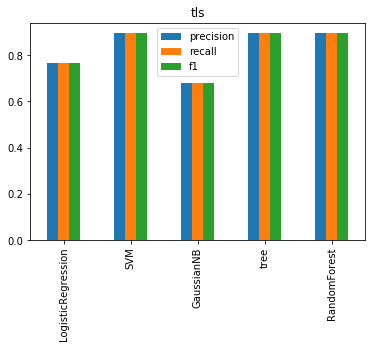

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
import random
examples = result_df.values.copy()
#print(examples)
score_df = pd.DataFrame(np.zeros((5,3)),index = ['LogisticRegression', 'SVM', 'GaussianNB', 'tree', 'RandomForest'], \
                        columns = ['precision', 'recall', 'f1'])
#def a():
f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = LogisticRegression()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['LogisticRegression'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = SVC()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['SVM'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = GaussianNB()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['GaussianNB'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = tree.DecisionTreeClassifier()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['tree'] = scores

f1_score_list = list()
recall_score_list = list()
precision_score_list = list()
for i in range(1):
    #np.random.shuffle(examples)
    examples_train = examples[:int(len(examples)*0.75)]
    examples_test = examples[int(len(examples)*0.75):]
    x_train = examples_train[:,0:-1]
    y_train = examples_train[:,-1]
    x_test = examples_test[:,0:-1]
    y_test = examples_test[:,-1]
    classifer = RandomForestClassifier()
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    f1_score_list.append(f1_score(y_test, y_pred, average='micro'))
    recall_score_list.append(recall_score(y_test, y_pred, average='micro'))
    precision_score_list.append(precision_score(y_test, y_pred, average='micro'))
scores = [np.mean(precision_score_list), np.mean(recall_score_list), np.mean(f1_score_list)]
score_df.loc['RandomForest'] = scores
ax = score_df.plot.bar(title='tls')
fig = ax.get_figure()
fig.savefig('../figure/ssl.svg')
print(scores)